In [1]:
import pandas as pd

# Load the datasets
bbc = pd.read_csv("/kaggle/input/tv-commercial-nithi/BBC_Cleaned.csv")
cnn = pd.read_csv("/kaggle/input/tv-commercial-nithi/CNN_Cleaned.csv")
cnnibn = pd.read_csv("/kaggle/input/tv-commercial-nithi/CNNIBN_Cleaned.csv")
ndtv = pd.read_csv("/kaggle/input/tv-commercial-nithi/NDTV_Cleaned.csv")
timesnow = pd.read_csv("/kaggle/input/tv-commercial-nithi/TIMESNOW_Cleaned.csv")

# Combine the datasets into one
df = pd.concat([bbc, cnn, cnnibn, ndtv, timesnow], ignore_index=True)

# Display the first few rows of the combined dataframe
df.head()

,1,2,3,4,5,6,7,8,9,10,...,230,231,269,317,463,519,1028,137,689,128
0,123,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,0.050768,3808.067871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,124,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,3466.266113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,3798.196533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,3761.712402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,3784.488037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check for missing values
df.isnull().sum()

1            0
2            0
3            0
4            0
5            0
         ...  
519     126637
1028    128815
137     129377
689     129592
128     129588
Length: 215, dtype: int64

In [3]:
# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA): More

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '230', '231', '269', '317', '463', '519', '1028', '137', '689', '128'],
      dtype='object', length=215)


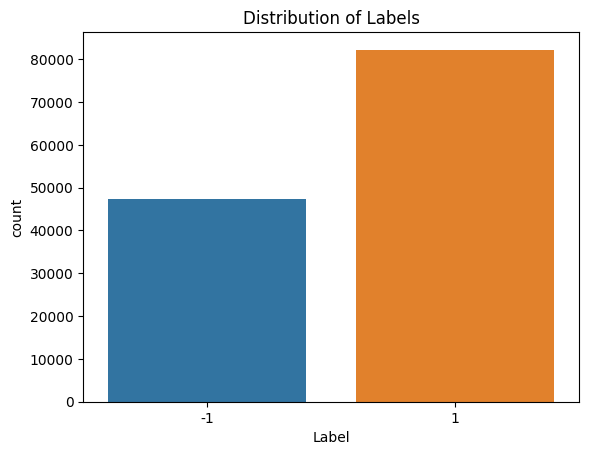

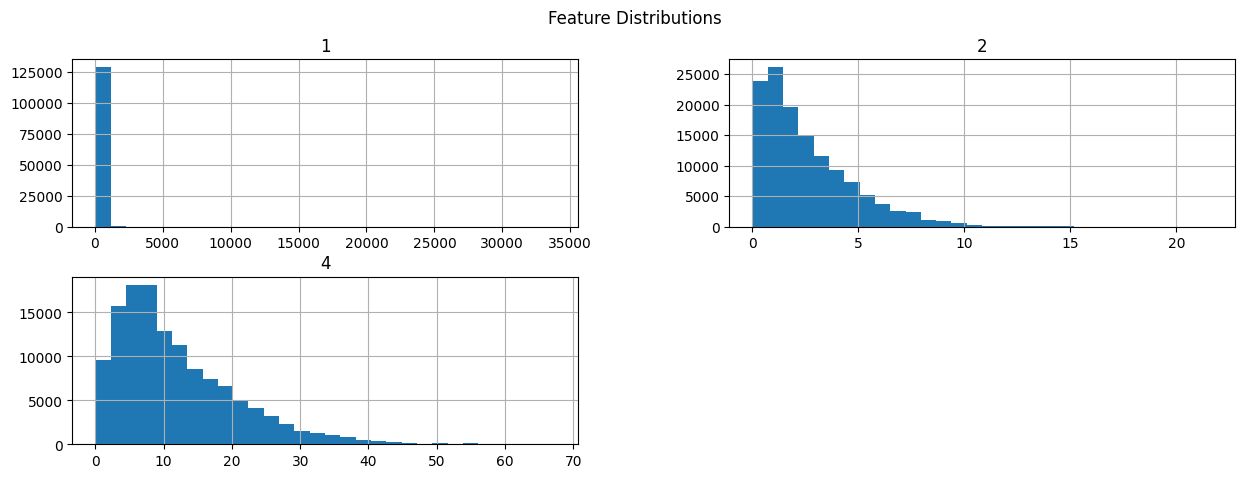

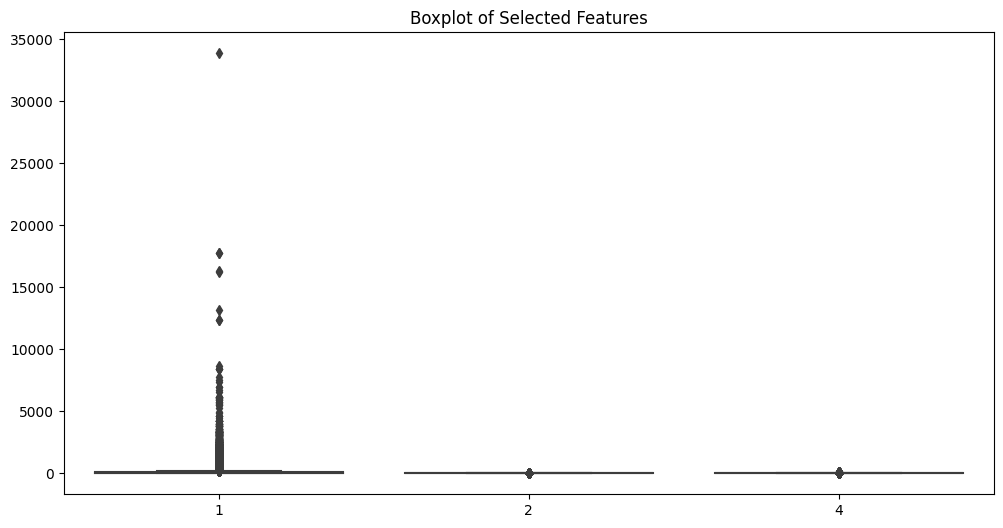

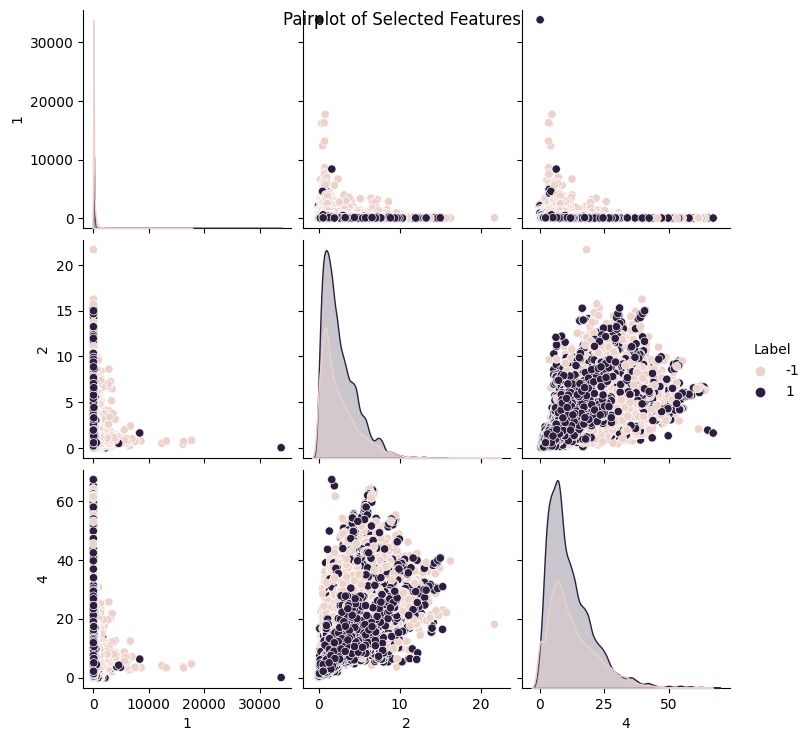

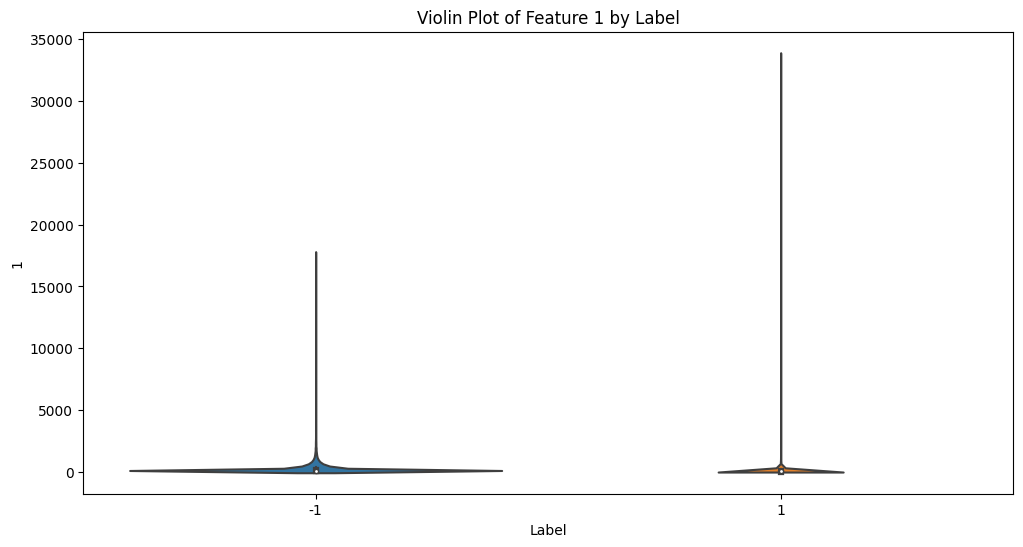

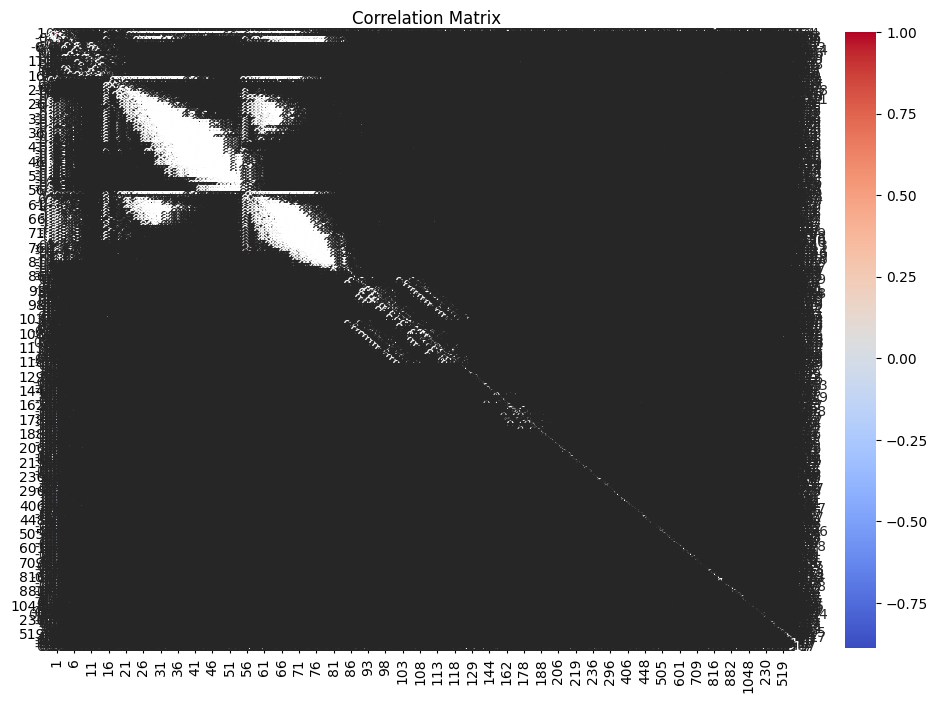

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names
print(df.columns)

# Plot the distribution of the label
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.show()

# Plot the distribution of a few selected features
selected_features = ['1', '2', '4']  # Replace with actual column names or indices
df[selected_features].hist(bins=30, figsize=(15, 5))
plt.suptitle('Feature Distributions')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_features])
plt.title('Boxplot of Selected Features')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df[selected_features + ['Label']], hue='Label')
plt.suptitle('Pairplot of Selected Features')
plt.show()

# Violin plot to visualize distribution of data across different categories
plt.figure(figsize=(12, 6))
sns.violinplot(x='Label', y='1', data=df)  # Replace '1' with actual feature name
plt.title('Violin Plot of Feature 1 by Label')
plt.show()

# Plot correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
